# Project Problem Statement:
A Company wants to automate the loan eligibility process based on customer details provided while filling online application form. The details filled by the customer are Gender, Marital Status, Education, Number of Dependents, Income of self and co applicant, Required Loan Amount, Required Loan Term, Credit History and others. The requirements are as follows:

1.Check eligibility of the Customer given the inputs described above.

2.Identify customer segments from given data and categorize customer into one of the segments.

3.If customer is not eligible for the input required amount and duration:

3.1 What can be amount for the given duration. 
3.2 If duration is less than equal to 20 years, is customer eligible for  required amount for some longer duration?     What is that duration?


In [1]:
from warnings import filterwarnings
filterwarnings("ignore")

In [3]:
import pandas as pd
A=pd.read_csv("C:/Users/LENOVO/Downloads/Training.csv")

In [4]:
A.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,NaN,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y


# Missing Data Treatement

In [5]:
A.isna().sum()

Loan_ID               0
Gender               15
Married               3
Dependents           15
Education             1
Self_Employed        32
ApplicantIncome       2
CoapplicantIncome     1
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
from preprocessing_6PM import replacer
replacer(A)

In [7]:
A.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [8]:
Y=A[["Loan_Status"]]

In [9]:
X = A.drop(labels=["Loan_ID","Loan_Status"],axis=1)

# Exploratory Data Analysis

In [10]:
cat=[]
con=[]
for i in X.columns:
    if(X[i].dtypes=="object"):
        cat.append(i)
    else:
        con.append(i)

In [11]:
imp_cols=[]

In [12]:
from PM8 import ANOVA
for i in con:
    q = ANOVA(A,"Loan_Status",i)
    print("-------------")
    print("Loan_Status vs",i)
    print("Pval: ",q)
    if(q < 0.15):
        imp_cols.append(i)



-------------
Loan_Status vs ApplicantIncome
Pval:  0.903
-------------
Loan_Status vs CoapplicantIncome
Pval:  0.142
-------------
Loan_Status vs LoanAmount
Pval:  0.368
-------------
Loan_Status vs Loan_Amount_Term
Pval:  0.604
-------------
Loan_Status vs Credit_History
Pval:  0.0


# Preprocessing

In [13]:
X.skew()

ApplicantIncome      6.538870
CoapplicantIncome    7.492000
LoanAmount           2.726601
Loan_Amount_Term    -2.389680
Credit_History      -1.963600
dtype: float64

In [14]:
from numpy import log

def skew_rem(df,col):
    q = []
    for i in df[col]:
        if(i != 0):
            q.append(log(i))
        else:
            q.append(i)
    df[col] = q


In [15]:
skew_rem(X,'ApplicantIncome')
skew_rem(X,'CoapplicantIncome')

In [16]:
X.skew()

ApplicantIncome      0.477562
CoapplicantIncome   -0.172920
LoanAmount           2.726601
Loan_Amount_Term    -2.389680
Credit_History      -1.963600
dtype: float64

In [17]:
X1=A[["CoapplicantIncome","Credit_History","Married","Education","Property_Area"]]

In [18]:
from PM8 import preprocessing
Xnew = preprocessing(X1)


In [19]:
Xnew.head()

,CoapplicantIncome,Credit_History,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,-0.554368,0.45164,1,0,1,0,0,0,1
1,-0.038610,0.45164,0,1,1,0,1,0,0
2,-0.554368,0.45164,0,1,1,0,0,0,1
3,0.252103,0.45164,0,1,0,1,0,0,1
4,-0.554368,0.45164,1,0,1,0,0,0,1


# Divide Data IN training and testing

In [20]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=21)

# Create a ML  model

In [21]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

model = lr.fit(xtrain,ytrain)

# Create prediction

In [22]:
pred_tr = model.predict(xtrain)
pred_ts = model.predict(xtest)

# Error/Loss Overfitting?

In [23]:
from sklearn.metrics import accuracy_score
tr_acc = accuracy_score(ytrain,pred_tr)
ts_acc = accuracy_score(ytest,pred_ts)

In [24]:
tr_acc

0.8126272912423625

In [25]:
ts_acc

0.8130081300813008

# Try Tree model


In [26]:
X = A.drop(labels=["Loan_ID","Loan_Status"],axis=1)
Xnew = preprocessing(X)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=21)

from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
model = dtc.fit(xtrain,ytrain)

pred_tr = model.predict(xtrain)
pred_ts = model.predict(xtest)

from sklearn.metrics import accuracy_score
tr_acc = accuracy_score(ytrain,pred_tr)
ts_acc = accuracy_score(ytest,pred_ts)

In [27]:
tr_acc

1.0

In [28]:
ts_acc

0.7073170731707317

In [29]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
def tree(dtc):
    model = dtc.fit(xtrain,ytrain)
    pred_tr = model.predict(xtrain)
    pred_ts = model.predict(xtest)
    from sklearn.metrics import accuracy_score
    tr_acc = accuracy_score(ytrain,pred_tr)
    ts_acc = accuracy_score(ytest,pred_ts)
    return tr_acc,ts_acc

In [30]:
tree(dtc)


(1.0, 0.6991869918699187)

In [31]:
for i in range(2,30,1):
    from sklearn.tree import DecisionTreeClassifier
    dtc = DecisionTreeClassifier(random_state=21,max_depth=i)
    print(tree(dtc))

(0.814663951120163, 0.8211382113821138)
(0.814663951120163, 0.8211382113821138)
(0.8268839103869654, 0.7886178861788617)
(0.8370672097759674, 0.8048780487804879)
(0.8553971486761711, 0.7886178861788617)
(0.8737270875763747, 0.7804878048780488)
(0.890020366598778, 0.7723577235772358)
(0.90020366598778, 0.7642276422764228)
(0.9226069246435845, 0.7642276422764228)
(0.9389002036659878, 0.7154471544715447)
(0.9531568228105907, 0.6991869918699187)
(0.9613034623217923, 0.6910569105691057)
(0.9674134419551935, 0.6747967479674797)
(0.9796334012219959, 0.6829268292682927)
(0.9877800407331976, 0.7073170731707317)
(0.9959266802443992, 0.6910569105691057)
(0.9979633401221996, 0.6829268292682927)
(1.0, 0.6910569105691057)
(1.0, 0.6910569105691057)
(1.0, 0.6910569105691057)
(1.0, 0.6910569105691057)
(1.0, 0.6910569105691057)
(1.0, 0.6910569105691057)
(1.0, 0.6910569105691057)
(1.0, 0.6910569105691057)
(1.0, 0.6910569105691057)
(1.0, 0.6910569105691057)
(1.0, 0.6910569105691057)


In [32]:
for i in range(2,30,1):
    from sklearn.tree import DecisionTreeClassifier
    dtc = DecisionTreeClassifier(random_state=21,min_samples_leaf=i)
    print(tree(dtc))

(0.9470468431771895, 0.6747967479674797)
(0.9144602851323829, 0.6910569105691057)
(0.8859470468431772, 0.6991869918699187)
(0.8757637474541752, 0.7398373983739838)
(0.8574338085539714, 0.6829268292682927)
(0.8472505091649695, 0.7154471544715447)
(0.8411405295315683, 0.7154471544715447)
(0.8411405295315683, 0.7235772357723578)
(0.8309572301425662, 0.7560975609756098)
(0.8309572301425662, 0.7723577235772358)
(0.8309572301425662, 0.7723577235772358)
(0.8309572301425662, 0.7723577235772358)
(0.8289205702647657, 0.7723577235772358)
(0.8309572301425662, 0.7560975609756098)
(0.8268839103869654, 0.7479674796747967)
(0.8228105906313645, 0.7560975609756098)
(0.814663951120163, 0.7073170731707317)
(0.814663951120163, 0.7073170731707317)
(0.814663951120163, 0.7073170731707317)
(0.814663951120163, 0.6991869918699187)
(0.8105906313645621, 0.6829268292682927)
(0.8085539714867617, 0.7723577235772358)
(0.8085539714867617, 0.7723577235772358)
(0.8085539714867617, 0.7723577235772358)
(0.8065173116089613,

In [33]:
for i in range(2,40,1):
    from sklearn.tree import DecisionTreeClassifier
    dtc = DecisionTreeClassifier(random_state=21,min_samples_split=i)
    print(tree(dtc))

(1.0, 0.6910569105691057)
(0.9877800407331976, 0.6991869918699187)
(0.9694501018329938, 0.7073170731707317)
(0.955193482688391, 0.6910569105691057)
(0.9368635437881874, 0.6829268292682927)
(0.9226069246435845, 0.6747967479674797)
(0.9185336048879837, 0.6747967479674797)
(0.9185336048879837, 0.6747967479674797)
(0.9063136456211812, 0.6829268292682927)
(0.9022403258655805, 0.6829268292682927)
(0.9022403258655805, 0.6829268292682927)
(0.9022403258655805, 0.6829268292682927)
(0.8961303462321792, 0.6910569105691057)
(0.890020366598778, 0.6747967479674797)
(0.8879837067209776, 0.6829268292682927)
(0.8879837067209776, 0.6829268292682927)
(0.8879837067209776, 0.6829268292682927)
(0.8859470468431772, 0.6829268292682927)
(0.8859470468431772, 0.6829268292682927)
(0.879837067209776, 0.6910569105691057)
(0.8778004073319755, 0.6910569105691057)
(0.8778004073319755, 0.6910569105691057)
(0.8778004073319755, 0.6991869918699187)
(0.8757637474541752, 0.6991869918699187)
(0.8716904276985743, 0.69918699186

# Try Adaboost

In [34]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(DecisionTreeClassifier(random_state=21,max_depth=2),n_estimators=30)
tree(abc)

(0.9063136456211812, 0.7073170731707317)

In [35]:
for i in range(2,50):
    abc = AdaBoostClassifier(DecisionTreeClassifier(random_state=21,max_depth=2),n_estimators=i)
    print(tree(abc))

(0.814663951120163, 0.8211382113821138)
(0.814663951120163, 0.7804878048780488)
(0.8167006109979633, 0.7723577235772358)
(0.8187372708757638, 0.7560975609756098)
(0.8289205702647657, 0.7154471544715447)
(0.8268839103869654, 0.7154471544715447)
(0.8329938900203666, 0.7235772357723578)
(0.8431771894093686, 0.7235772357723578)
(0.8472505091649695, 0.7235772357723578)
(0.8533604887983707, 0.7235772357723578)
(0.8574338085539714, 0.7398373983739838)
(0.8635437881873728, 0.7398373983739838)
(0.8615071283095723, 0.7560975609756098)
(0.869653767820774, 0.7154471544715447)
(0.8716904276985743, 0.7073170731707317)
(0.8737270875763747, 0.7073170731707317)
(0.8757637474541752, 0.7479674796747967)
(0.8839103869653768, 0.7235772357723578)
(0.8839103869653768, 0.7317073170731707)
(0.879837067209776, 0.7398373983739838)
(0.8961303462321792, 0.7073170731707317)
(0.8940936863543788, 0.6991869918699187)
(0.8961303462321792, 0.6991869918699187)
(0.90020366598778, 0.6910569105691057)
(0.90020366598778, 0.6

In [36]:
dtc = DecisionTreeClassifier(random_state=21,max_depth=2)
model = dtc.fit(Xnew,Y)

# Make Predictiion using best model

In [38]:
B = pd.read_csv("C:/Users/LENOVO/Downloads/Testing.csv")


In [39]:
B.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban


In [40]:
X = B.drop(labels=["Loan_ID"],axis=1)
replacer(X)
Xnew = preprocessing(X)
pred = model.predict(Xnew)

In [41]:
B['Loan_Status_Pred']=pred



In [42]:
B.head(3)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status_Pred
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,Y
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,Y
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,Y


In [43]:
pd.DataFrame([Xnew.columns,dtc.feature_importances_]).T


,0,1
0,ApplicantIncome,0.0
1,CoapplicantIncome,0.042743
2,LoanAmount,0.020849
3,Loan_Amount_Term,0.0
4,Credit_History,0.936407
5,Gender_Female,0.0
6,Gender_Male,0.0
7,Married_No,0.0
8,Married_Yes,0.0
9,Dependents_0,0.0


# Identify customer segments


In [44]:
X = A[["Credit_History","LoanAmount","CoapplicantIncome"]]


In [45]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
Xnew = pd.DataFrame(ss.fit_transform(X),columns=["Credit_History","LoanAmount","CoapplicantIncome"])

In [46]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=2)
model = km.fit(Xnew)

In [47]:
X['Cluster'] = model.labels_


In [48]:
q = []
for i in X.Credit_History:
    if(i < 0.5):
        q.append(0)
    else:
        q.append(1)

In [49]:
X.Credit_History = q


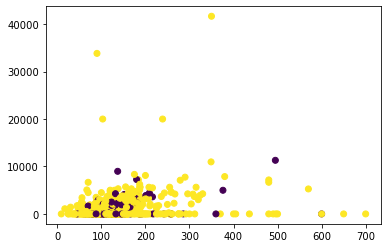

In [50]:
import matplotlib.pyplot as plt
plt.scatter(X.LoanAmount,X.CoapplicantIncome,c=q)

In [51]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
w = le.fit_transform(A['Loan_Status'])


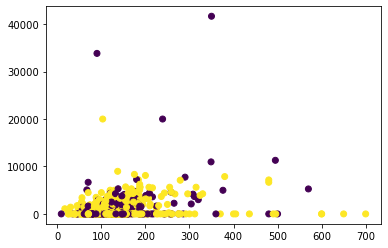

In [52]:
plt.scatter(X.LoanAmount,X.CoapplicantIncome,c=w)


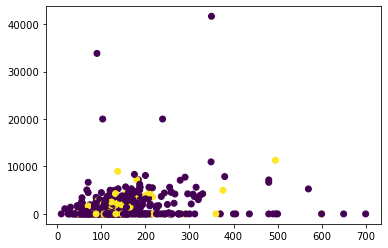

In [53]:
plt.scatter(X.LoanAmount,X.CoapplicantIncome,c=X.Cluster)


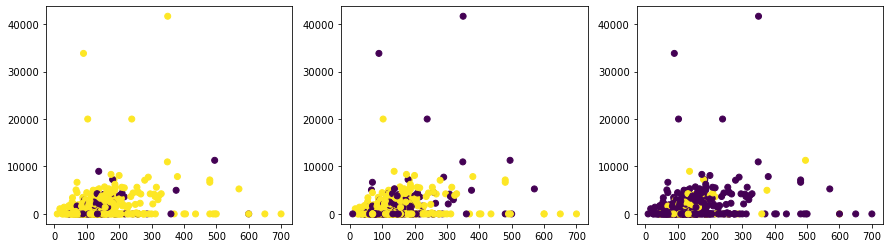

In [54]:
plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
plt.scatter(X.LoanAmount,X.CoapplicantIncome,c=q)
plt.subplot(1,3,2)
plt.scatter(X.LoanAmount,X.CoapplicantIncome,c=w)
plt.subplot(1,3,3)
plt.scatter(X.LoanAmount,X.CoapplicantIncome,c=X.Cluster)

# 3.)If customer is not eligible for the input required amount and duration:


a.)what can be amount for the given duration.(Regression)



# Prepare Training Data


In [56]:
P1 = A[A.Loan_Status == "Y"]


In [57]:
P2 = B[B.Loan_Status_Pred == "Y"]


In [58]:
P2 = P2.rename({"Loan_Status_Pred":"Loan_Status"},axis=1)


In [59]:
trd = pd.concat([P1,P2])


# Missing Data


In [60]:
replacer(trd)


In [61]:
#trd.isna().sum()


In [62]:
cat = []
con = []
for i in trd.columns:
    if(trd[i].dtypes == "object"):
        cat.append(i)
    else:
        con.append(i)

In [63]:
con

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [64]:
cat.remove("Loan_ID")
con.remove("LoanAmount")
cat.remove("Loan_Status")

# Define Y and X

In [65]:
Y = trd[["LoanAmount"]]
X = trd.drop(labels=["LoanAmount","Loan_ID","Loan_Status"],axis=1)
from sklearn.preprocessing import StandardScaler
ss1 = StandardScaler()
X1 = pd.DataFrame(ss1.fit_transform(X[con]),columns=con)
X2 = pd.get_dummies(X[cat])
X2.index = range(0,725)
Xnew = X1.join(X2)

In [66]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=21)

In [67]:
trd.corr()[["LoanAmount"]]


,LoanAmount
ApplicantIncome,0.579186
CoapplicantIncome,0.142011
LoanAmount,1.000000
Loan_Amount_Term,0.059974
Credit_History,-0.095110


In [69]:
for i in X.columns:
    if(X[i].dtypes == "object"):
        print("------------------------")
        print("Loan AMt vs",i)
        print(ANOVA(trd,i,"LoanAmount"))

------------------------
Loan AMt vs Gender
0.003
------------------------
Loan AMt vs Married
0.0
------------------------
Loan AMt vs Dependents
0.0
------------------------
Loan AMt vs Education
0.0
------------------------
Loan AMt vs Self_Employed
0.0
------------------------
Loan AMt vs Property_Area
0.808


# Create a ML model


In [70]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
model = lm.fit(xtrain,ytrain)

In [71]:
from PM8 import find_overfit_con


In [72]:
find_overfit_con(lm,xtrain, xtest, ytrain, ytest)


training error:  36.13269294032183
testing error:  38.450512581547066


# Prepare Data for making predictions


In [73]:
test = B[B.Loan_Status_Pred == "N"]


In [74]:
test = test.drop(labels=["Loan_Status_Pred","Loan_ID","LoanAmount"],axis=1)


In [75]:
replacer(test)
test.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [76]:
Xnew.shape


(725, 19)

In [77]:
ss1 = StandardScaler()
X1 = pd.DataFrame(ss1.fit_transform(test[con]),columns=con)
X2 = pd.get_dummies(test[cat])
X2.index = range(0,64)
Xnew = X1.join(X2)

In [78]:
pred = model.predict(Xnew)


In [79]:
pred


array([[130. ],
       [286. ],
       [136. ],
       [106.5],
       [ 95. ],
       [147. ],
       [ 97. ],
       [135.5],
       [128.5],
       [127. ],
       [138.5],
       [149.5],
       [122.5],
       [150.5],
       [161. ],
       [129.5],
       [ 82. ],
       [106.5],
       [ 93.5],
       [103.5],
       [115.5],
       [264. ],
       [158. ],
       [130. ],
       [172. ],
       [199.5],
       [106. ],
       [103.5],
       [ 78. ],
       [ 72. ],
       [120.5],
       [ 86.5],
       [101. ],
       [138.5],
       [110. ],
       [156. ],
       [122. ],
       [149. ],
       [174. ],
       [143. ],
       [344.5],
       [ 96. ],
       [116. ],
       [207. ],
       [141.5],
       [116.5],
       [112.5],
       [141.5],
       [ 98.5],
       [146.5],
       [179.5],
       [178.5],
       [118. ],
       [125.5],
       [280.5],
       [116. ],
       [176. ],
       [119. ],
       [ 90.5],
       [ 65. ],
       [137.5],
       [131.5],
       [

In [80]:
B

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status_Pred
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,Y
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,Y
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,Y
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban,Y
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban,Y
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban,Y
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban,Y
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural,Y


In [81]:
B[B.Loan_Status_Pred == "N"]


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status_Pred
7,LP001056,Male,Yes,2,Not Graduate,No,3881,0,147.0,360.0,0.0,Rural,N
13,LP001094,Male,Yes,2,Graduate,NaN,12173,0,166.0,360.0,0.0,Semiurban,N
25,LP001153,Male,No,0,Graduate,No,0,24000,148.0,360.0,0.0,Rural,N
35,LP001203,Male,No,0,Graduate,No,3150,0,176.0,360.0,0.0,Semiurban,N
55,LP001313,Male,No,0,Graduate,No,2750,0,130.0,360.0,0.0,Urban,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,LP002802,Male,No,0,Graduate,No,2875,2416,95.0,6.0,0.0,Semiurban,N
339,LP002858,Female,No,0,Graduate,No,4333,2333,162.0,360.0,0.0,Rural,N
346,LP002879,Male,Yes,0,Graduate,No,3391,1966,133.0,360.0,0.0,Rural,N
351,LP002901,Male,No,0,Graduate,No,2283,15000,106.0,360.0,NaN,Rural,N


# b.)if duration is less than equal to 20 years, is customer eligible for required amount for some longer duration? What is that duration?(Regression)

In [83]:
test = B[B.Loan_Amount_Term <= 240]
test.index = range(0,34)

In [84]:
replacer(A)
Y = A[["Loan_Amount_Term"]]
X = A.drop(labels=["Loan_Amount_Term","Loan_ID","Loan_Status"],axis=1)
Xnew = preprocessing(X)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=21)

In [85]:
X.shape


(614, 10)

In [86]:
X.columns


Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Credit_History',
       'Property_Area'],
      dtype='object')

In [87]:
lm = LinearRegression()
find_overfit_con(lm,xtrain,xtest,ytrain,ytest)

training error:  36.63543788187373
testing error:  34.83739837398374


In [89]:
replacer(test)
X = test.drop(labels=["Loan_Amount_Term","Loan_ID",'Loan_Status_Pred'],axis=1)
Xnew = preprocessing(X)

lm.predict(Xnew)


array([[348.5],
       [324.5],
       [358.5],
       [313. ],
       [352.5],
       [337. ],
       [333.5],
       [349. ],
       [327. ],
       [323.5],
       [354.5],
       [328.5],
       [336. ],
       [353. ],
       [352.5],
       [322.5],
       [356. ],
       [336.5],
       [355. ],
       [337.5],
       [334. ],
       [344. ],
       [350. ],
       [358.5],
       [362.5],
       [353. ],
       [351. ],
       [319.5],
       [357.5],
       [320. ],
       [338. ],
       [313. ],
       [317.5],
       [348. ]])

In [90]:
X.columns


Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Credit_History',
       'Property_Area'],
      dtype='object')